<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/baruu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
data.shape

(1000, 26)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data['Level_numeric'] = data['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

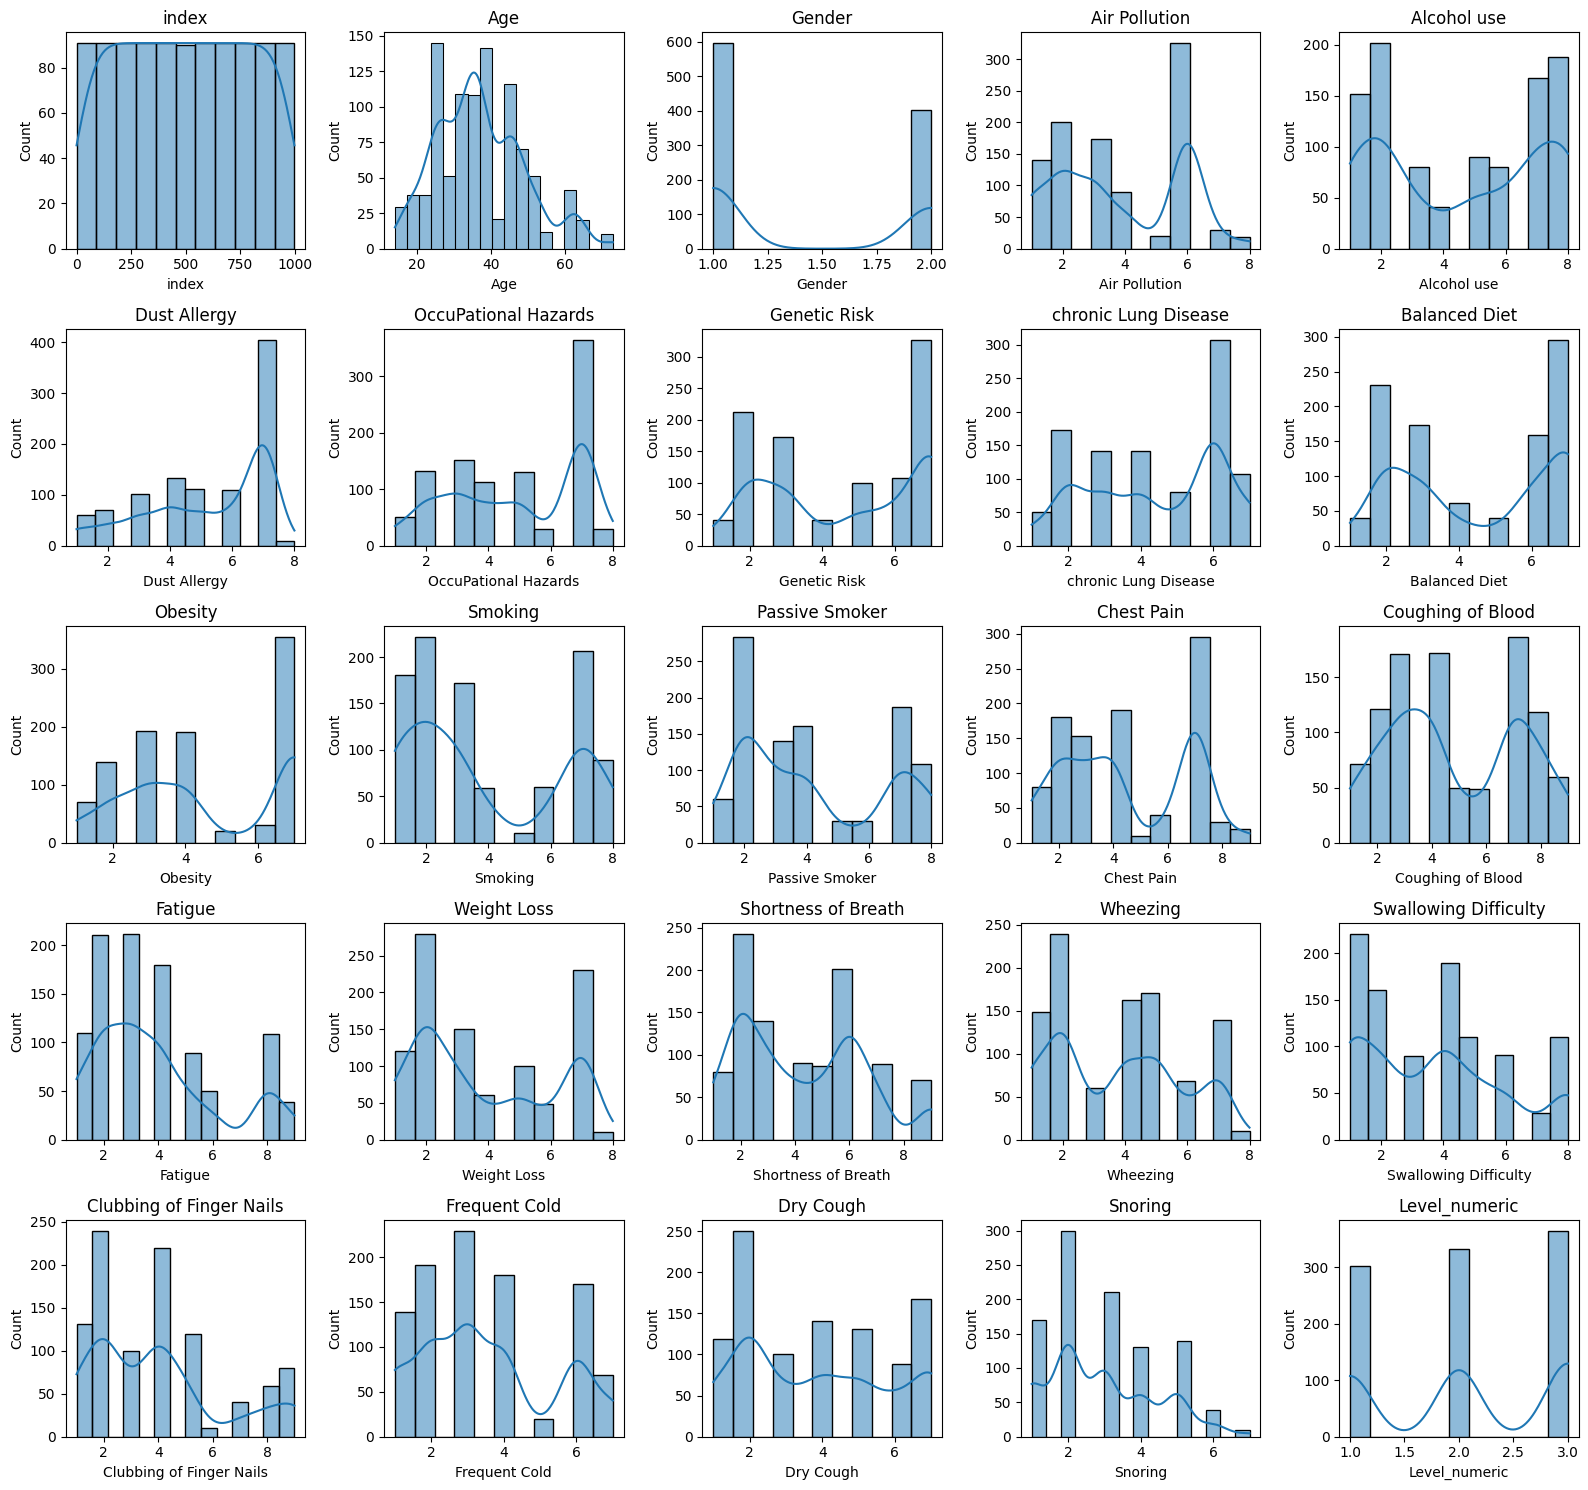

In [ ]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 15))
for i, col in enumerate(data_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data_numeric[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

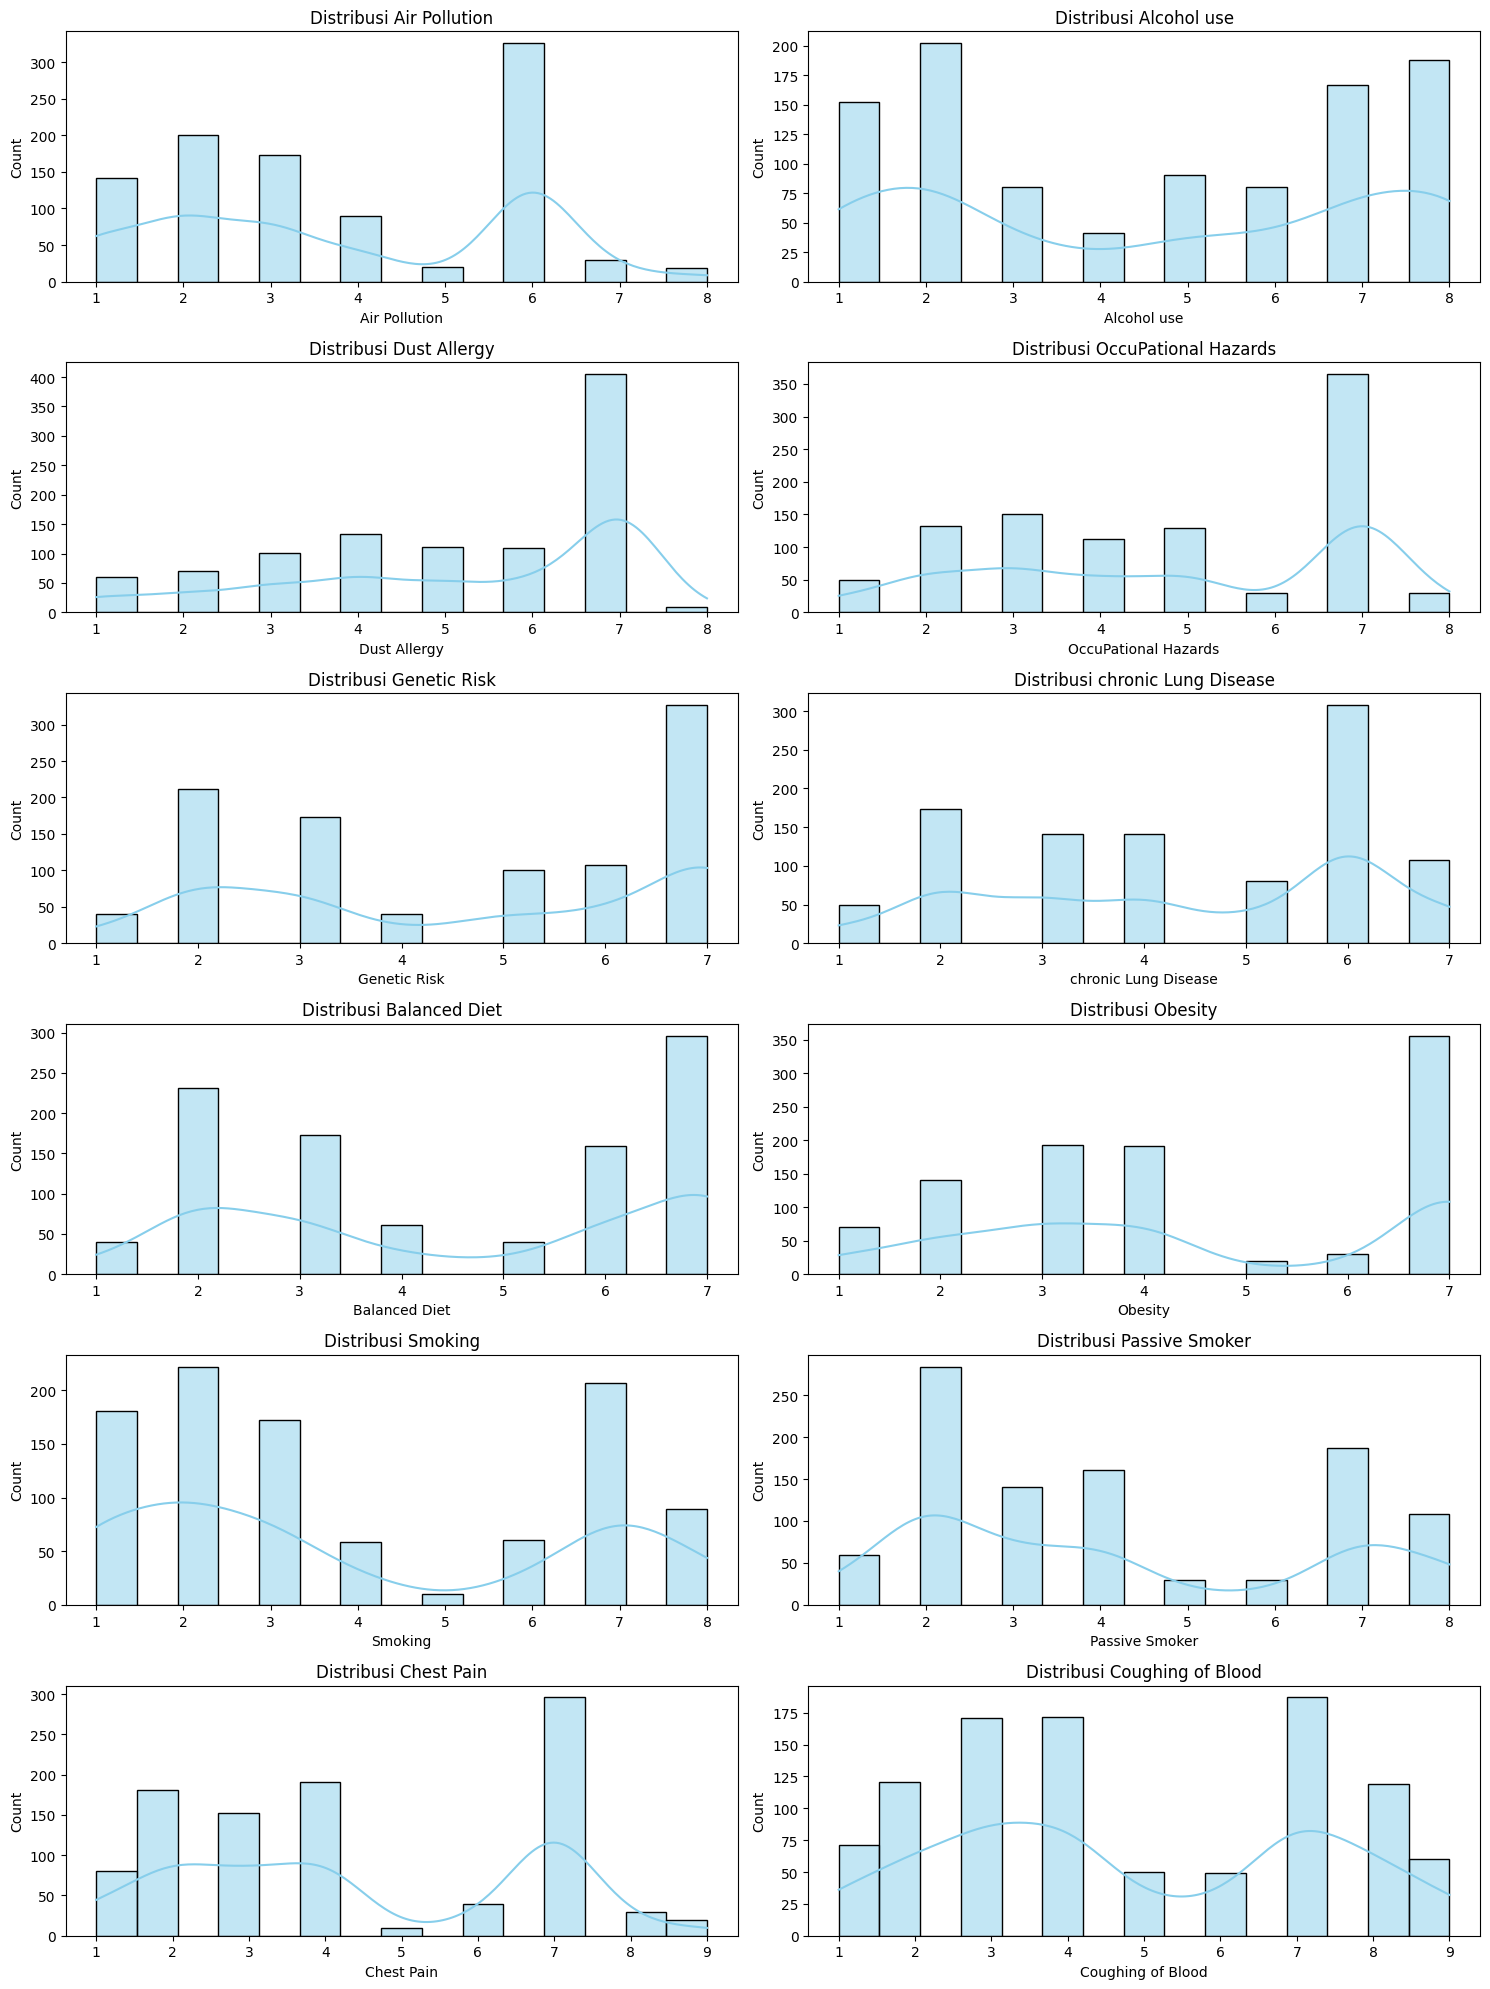

In [ ]:
fitur_merah = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
            'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
            'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']

fig, axs = plt.subplots(len(fitur_merah)//2, 2, figsize=(15, 20))

for i, feature in enumerate(fitur_merah):
    row = i // 2
    col = i % 2
    sns.histplot(data[feature], kde=True, ax=axs[row, col], bins=15, color='skyblue')
    axs[row, col].set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

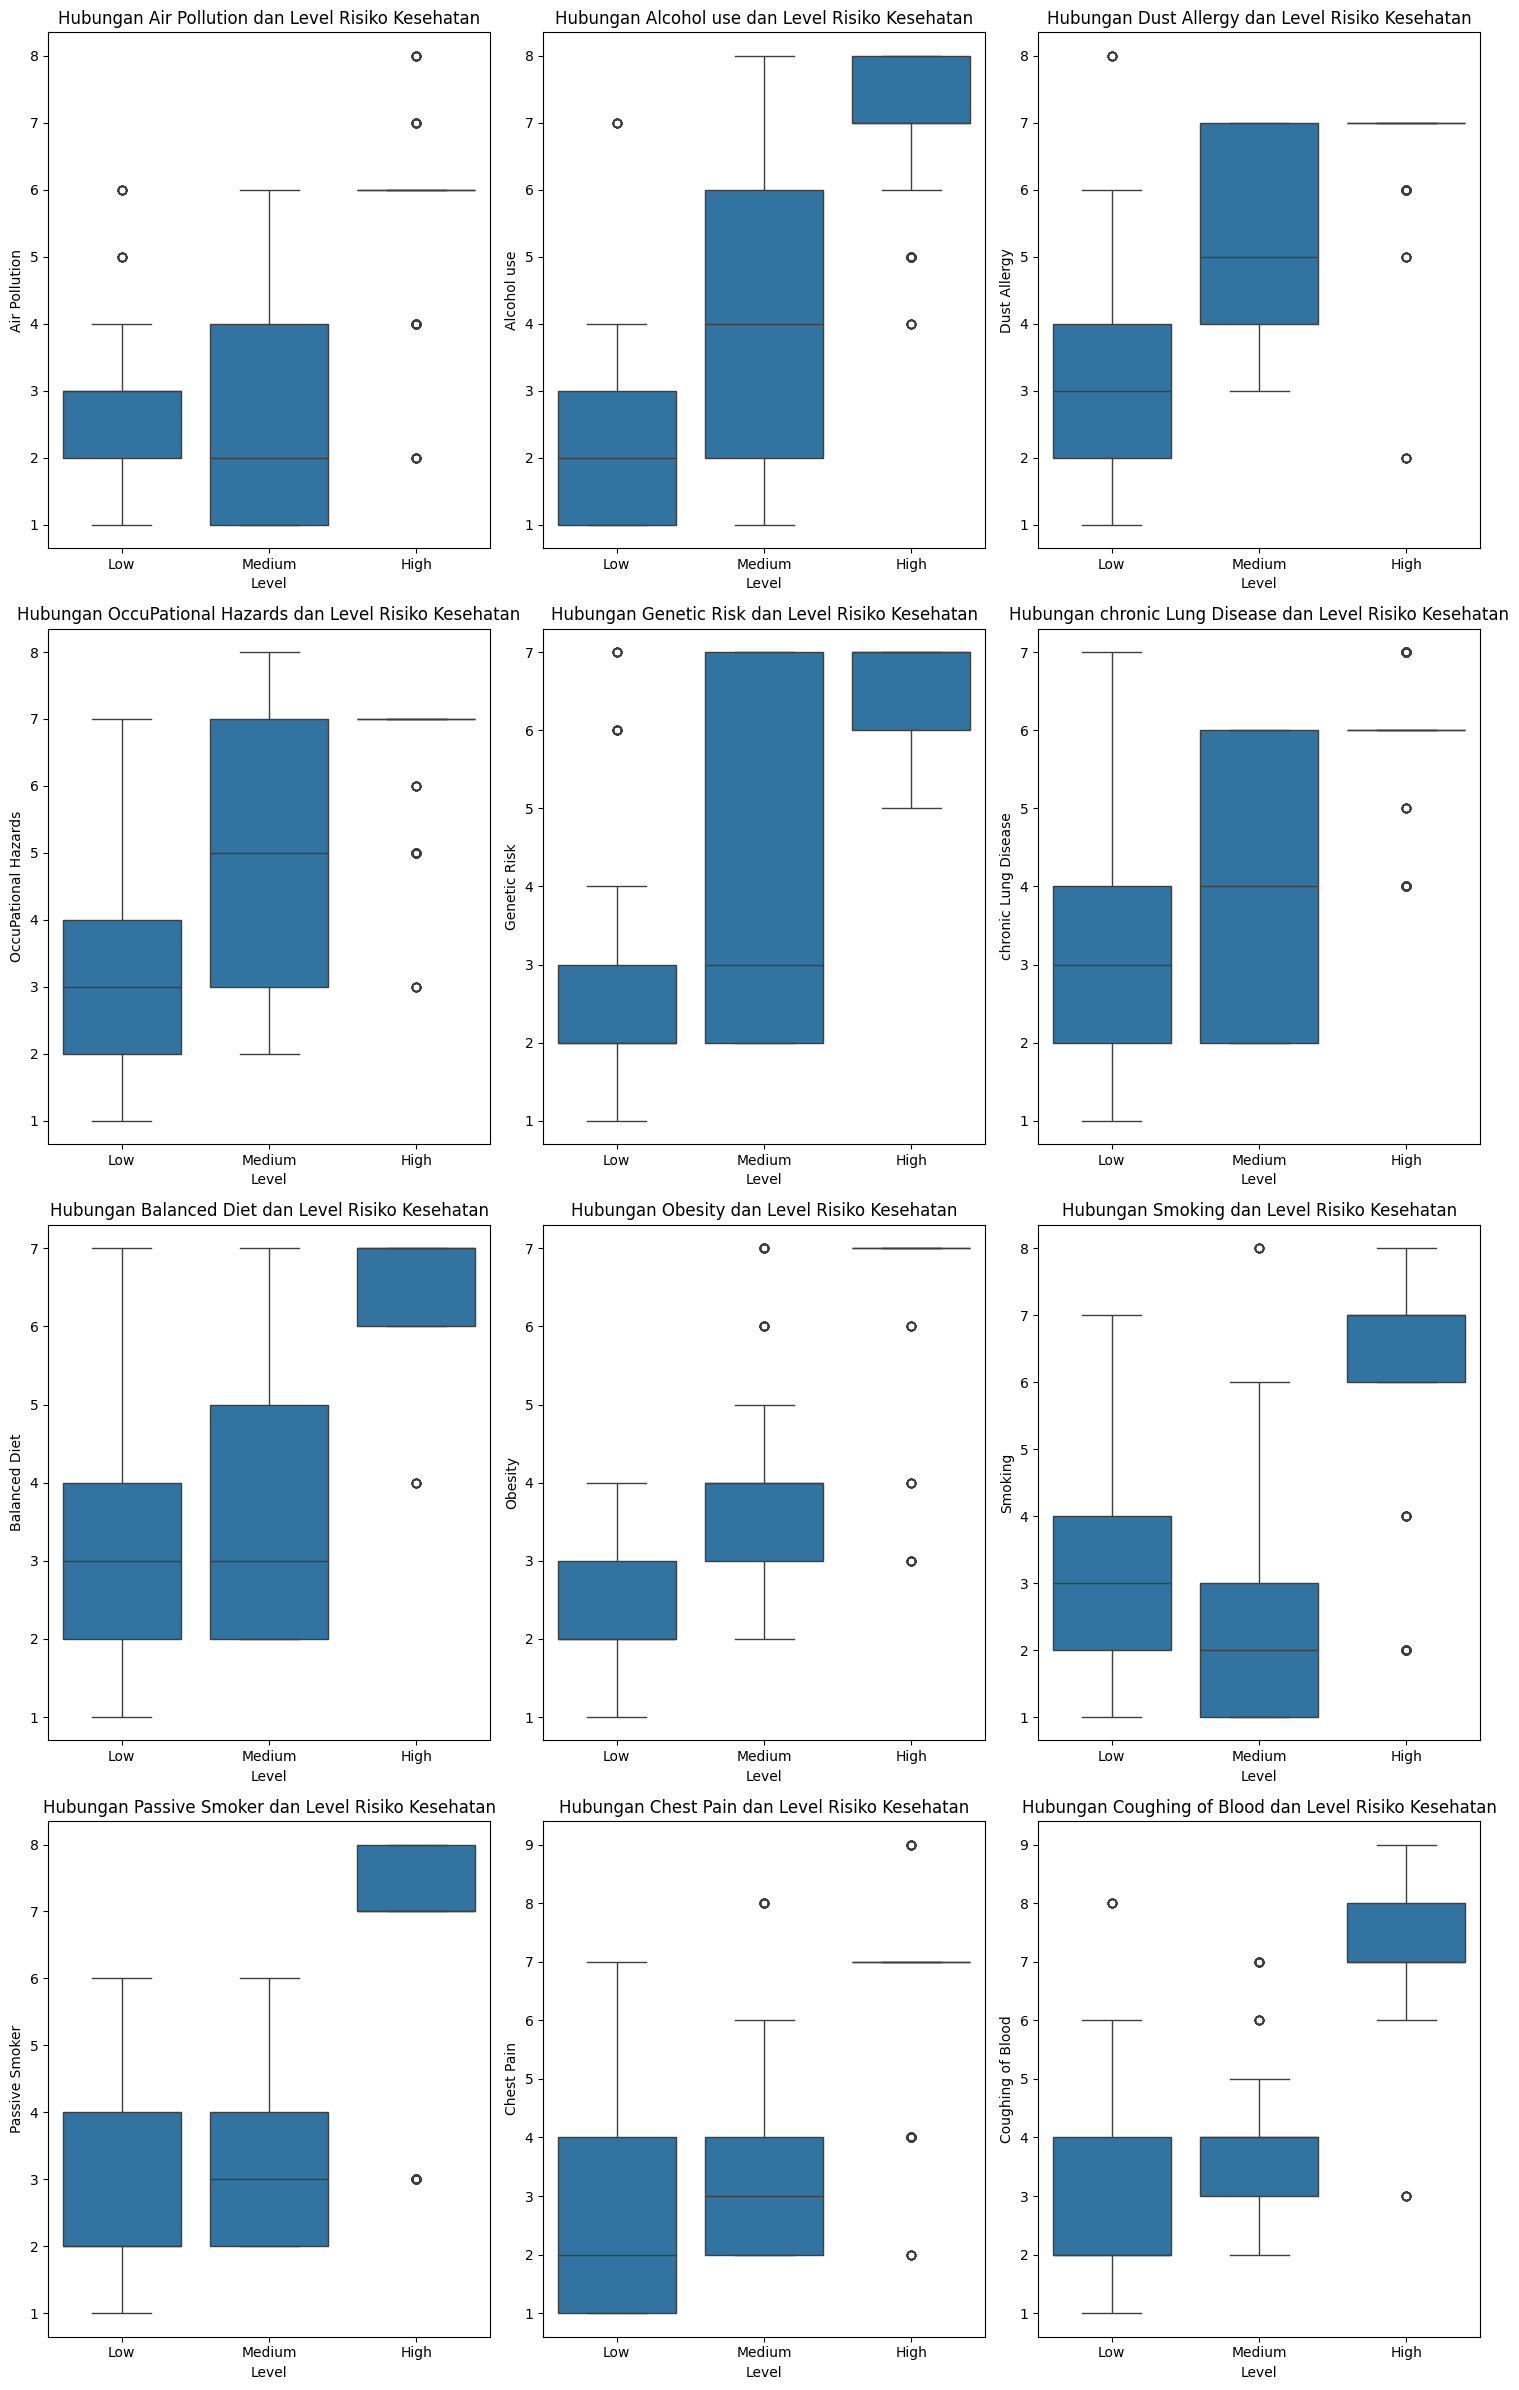

In [ ]:
fig, axs = plt.subplots(len(fitur_merah)//3, 3, figsize=(15, 24))

for i, feature in enumerate(fitur_merah):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Level', y=feature, data=data, order=['Low', 'Medium', 'High'], ax=axs[row, col])
    axs[row, col].set_title(f'Hubungan {feature} dan Level Risiko Kesehatan')

plt.tight_layout()
plt.show()